In [113]:
# Initialization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Project Overview<br>

## <h3>Objective 
<br>Analyze food inspection data from the city of Chicago.
<br>How restaurants recieved Passing Inspections after complaints? Is there anywhere I should avoid?
<br>Data includes inspection date, results, violations noted, business name and lat/lon, license# and risk. Data covers 01/02/2013-08/28/2017.

## <h3>Data Source
<a link>https://www.kaggle.com/datasets/chicago/chicago-food-inspections/data

# 2. Data Collection and Loading<br>

## <h3>Load Data & Initial Check

In [2]:
# Loading csv file
raw_inspection_data = pd.read_csv("food-inspections.csv")

# format check
print(raw_inspection_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196825 entries, 0 to 196824
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Inspection ID               196825 non-null  int64  
 1   DBA Name                    196825 non-null  object 
 2   AKA Name                    194367 non-null  object 
 3   License #                   196808 non-null  float64
 4   Facility Type               192057 non-null  object 
 5   Risk                        196756 non-null  object 
 6   Address                     196825 non-null  object 
 7   City                        196686 non-null  object 
 8   State                       196783 non-null  object 
 9   Zip                         196775 non-null  float64
 10  Inspection Date             196825 non-null  object 
 11  Inspection Type             196824 non-null  object 
 12  Results                     196825 non-null  object 
 13  Violations    

In [3]:
# checking format of data for first 5 rows
print(raw_inspection_data.head())

   Inspection ID                                 DBA Name  \
0        2352683                   CHIPOTLE MEXICAN GRILL   
1        2352734                              CHILI'S T-I   
2        2352713  NICK'S FIRE GRILL STEAK & LEMONADE INC.   
3        2352701                  TAQUERIA BLUE LINE INC.   
4        2352727                 PORTAGE PARK DAY NURSERY   

                                  AKA Name  License #  \
0                   CHIPOTLE MEXICAN GRILL  2670642.0   
1                         CHILI'S (T1-B14)    34169.0   
2  NICK'S FIRE GRILL STEAK & LEMONADE INC.  2699090.0   
3                                      NaN  2703436.0   
4           MOSAIC EARLY CHILDHOOD ACADEMY  2215815.0   

                  Facility Type           Risk                  Address  \
0                    Restaurant  Risk 1 (High)       1025 W ADDISON ST    
1                    Restaurant  Risk 1 (High)       11601 W TOUHY AVE    
2                           NaN  Risk 1 (High)          2900 W 63

In [4]:
# Checking Columns
raw_inspection_data.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

### Summary <br>
Looking at the Data it seems that there are extra columns with null data, I will format everything to capital letters, convert all the data types to strings, and remove extra columns that I dont plan on utilizing.

# 3. Data Cleaning and Preparation

In [5]:
# converted to uppercase, and removed whitespace

raw_inspection_data.columns = (
    raw_inspection_data.columns
    .str.upper()
    .str.strip()
)
raw_inspection_data.columns

Index(['INSPECTION ID', 'DBA NAME', 'AKA NAME', 'LICENSE #', 'FACILITY TYPE',
       'RISK', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'INSPECTION DATE',
       'INSPECTION TYPE', 'RESULTS', 'VIOLATIONS', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'HISTORICAL WARDS 2003-2015', 'ZIP CODES',
       'COMMUNITY AREAS', 'CENSUS TRACTS', 'WARDS'],
      dtype='object')

In [6]:
# Dropped extra columns left 'AKA NAME', 'FACILITY TYPE', 'LICENSE #','ADDRESS', 'CITY', 'STATE', 'ZIP','INSPECTION TYPE','INSPECTION DATE'

inspection_data_cleaned = raw_inspection_data.drop(
    ['INSPECTION ID',
     'DBA NAME',
     'VIOLATIONS',
     'LATITUDE',
     'LONGITUDE',
     'LOCATION',
     'HISTORICAL WARDS 2003-2015',
     'ZIP CODES',
     'COMMUNITY AREAS',
     'CENSUS TRACTS',
     'WARDS'], axis='columns'
     )
inspection_data_cleaned.columns

Index(['AKA NAME', 'LICENSE #', 'FACILITY TYPE', 'RISK', 'ADDRESS', 'CITY',
       'STATE', 'ZIP', 'INSPECTION DATE', 'INSPECTION TYPE', 'RESULTS'],
      dtype='object')

* I decided to handle missing values by dropping them.  It didn't seem to make since to do anything else due to the nature of this report.

In [42]:
# Dropped Null Values

inspection_data_cleaned = inspection_data_cleaned.dropna()
inspection_data_cleaned.shape[0]

189593

* I changed the data types to strings instead of objects primarily due to my next step of dropping the duplicate entries didn't seem to have any effect until I made the changes.

In [46]:
# Changed Data Types

inspection_data_cleaned[['AKA NAME', 'FACILITY TYPE', 'RISK', 'ADDRESS', 'CITY', 'STATE', 'LICENSE #', 'ZIP', 'INSPECTION TYPE', 'RESULTS']] = inspection_data_cleaned[['AKA NAME', 'FACILITY TYPE', 'RISK', 'ADDRESS', 'CITY', 'STATE', 'LICENSE #', 'ZIP', 'INSPECTION TYPE', 'RESULTS']].astype('string')

inspection_data_cleaned[['INSPECTION DATE']] = inspection_data_cleaned[['INSPECTION DATE']].astype('datetime64[s]')

#print(inspection_data_cleaned.head())
print(inspection_data_cleaned.info())

#inspection_data_cleaned.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 189593 entries, 0 to 196824
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype        
---  ------           --------------   -----        
 0   AKA NAME         189593 non-null  string       
 1   LICENSE #        189593 non-null  string       
 2   FACILITY TYPE    189593 non-null  string       
 3   RISK             189593 non-null  string       
 4   ADDRESS          189593 non-null  string       
 5   CITY             189593 non-null  string       
 6   STATE            189593 non-null  string       
 7   ZIP              189593 non-null  string       
 8   INSPECTION DATE  189593 non-null  datetime64[s]
 9   INSPECTION TYPE  189593 non-null  string       
 10  RESULTS          189593 non-null  string       
dtypes: datetime64[s](1), string(10)
memory usage: 17.4 MB
None


* Since I'm only interested in Restaraunt Data I filtered those out specifically.

In [47]:
# Pulling out Restaurant Data
restaurant_list = inspection_data_cleaned[inspection_data_cleaned["FACILITY TYPE"] == "Restaurant"]
restaurant_list

,AKA NAME,LICENSE #,FACILITY TYPE,RISK,ADDRESS,CITY,STATE,ZIP,INSPECTION DATE,INSPECTION TYPE,RESULTS
0,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04,License Re-Inspection,Pass w/ Conditions
1,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,2019-12-04,Canvass,Pass
5,AMARIT RESTAURANT,1801618.0,Restaurant,Risk 1 (High),600 S DEARBORN ST,CHICAGO,IL,60605.0,2019-12-04,Canvass Re-Inspection,Pass
6,CHIPOTLE MEXICAN GRILL,2670643.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04,License Re-Inspection,Pass w/ Conditions
10,BLUE LINE,1170410.0,Restaurant,Risk 1 (High),1548 N DAMEN AVE,CHICAGO,IL,60622.0,2019-12-03,Canvass Re-Inspection,Pass w/ Conditions
...,...,...,...,...,...,...,...,...,...,...,...
196820,Cafe 608,2013328.0,Restaurant,Risk 1 (High),608 W BARRY AVE,CHICAGO,IL,60657.0,2010-01-04,License Re-Inspection,Pass
196821,TEMPO CAFE,80916.0,Restaurant,Risk 1 (High),6 E CHESTNUT ST,CHICAGO,IL,60611.0,2010-01-04,Canvass,Fail
196822,TROQUET,1992039.0,Restaurant,Risk 1 (High),1834 W MONTROSE AVE,CHICAGO,IL,60613.0,2010-01-04,License Re-Inspection,Pass
196823,mr.daniel's,1899292.0,Restaurant,Risk 1 (High),5645 W BELMONT AVE,CHICAGO,IL,60634.0,2010-01-04,License Re-Inspection,Pass


* I decided that I only wanted to view inspections as a result of a complaint.

In [67]:
# Filter the restaurant list for inspections completed in 2015
restaurant_list_2015 = restaurant_list[
    (restaurant_list['INSPECTION DATE'] >= '2015-01-01') &
    (restaurant_list['INSPECTION DATE'] <= '2015-12-31')
]

In [68]:
# Sorted out by complaint
restaurant_list_2015 = restaurant_list_2015[restaurant_list_2015["INSPECTION TYPE"] == "Complaint"]
restaurant_list_2015

,AKA NAME,LICENSE #,FACILITY TYPE,RISK,ADDRESS,CITY,STATE,ZIP,INSPECTION DATE,INSPECTION TYPE,RESULTS
77742,BURGER KING,2411124.0,Restaurant,Risk 2 (Medium),733 E 47TH ST,CHICAGO,IL,60653.0,2015-12-31,Complaint,Pass
77766,KUMAS TOO,2203417.0,Restaurant,Risk 1 (High),666 W DIVERSEY PKWY,CHICAGO,IL,60614.0,2015-12-30,Complaint,Fail
77793,CHILI'S TOO (T2 F4),34192.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,2015-12-30,Complaint,Pass
77842,UNCLE JOE'S JERK CHICKEN & FISH,1145333.0,Restaurant,Risk 1 (High),10210 S VINCENNES AVE,CHICAGO,IL,60643.0,2015-12-29,Complaint,Pass
77852,THAI PASTRY RESTAURANT,2263388.0,Restaurant,Risk 1 (High),4925 N BROADWAY,CHICAGO,IL,60640.0,2015-12-29,Complaint,Pass
...,...,...,...,...,...,...,...,...,...,...,...
98619,MCDONALD'S,30231.0,Restaurant,Risk 2 (Medium),4946 N MILWAUKEE AVE,CHICAGO,IL,60630.0,2015-01-05,Complaint,Pass
98623,CHICAGO q,2021329.0,Restaurant,Risk 1 (High),1160 N DEARBORN ST,CHICAGO,IL,60610.0,2015-01-05,Complaint,Pass
98629,SUBWAY,1544868.0,Restaurant,Risk 1 (High),1916 S STATE ST,CHICAGO,IL,60616.0,2015-01-05,Complaint,Pass
98635,MARGARITA'S PIZZERIA,48819.0,Restaurant,Risk 1 (High),2705 - 2707 E 79TH ST,CHICAGO,IL,60649.0,2015-01-02,Complaint,Fail


* In order to be more accurate I wanted to seperate the data by the results of the Inspections.  This required making variables for each Inspection Result. These next entries would allow me to remove the complaints that were not inspected later.

In [69]:
# Number of Restaurants that were "Out of Business" when the inspector attempted to address the complaints.
bus_closed = restaurant_list_2015[restaurant_list_2015["RESULTS"] == "Out of Business"]
bus_closed = bus_closed.shape[0]
bus_closed


7

In [70]:
# Number of Restaurants that "No Entry" was listed.  This seems to be used for when the inspector could not gain access to the interior.
bus_no_entry = restaurant_list_2015[restaurant_list_2015["RESULTS"] == "No Entry"]
bus_no_entry = bus_no_entry.shape[0]
bus_no_entry

97

In [71]:
# Number of Restaurants that "Business Not Located" was listed.  This is where the restaurant could not be found by inspectors.
bus_notfound = restaurant_list_2015[restaurant_list_2015["RESULTS"] == "Business Not Located"]
bus_notfound = bus_notfound.shape[0]
bus_notfound

0

In [72]:
# Number of Restaurants that were not ready for inspection for no listed reason.
not_ready = restaurant_list_2015[restaurant_list_2015["RESULTS"] == "Not Ready"]
not_ready = not_ready.shape[0]
not_ready

1

# 4. Exploratory Data Analysis (EDA) 

In [193]:
# 5 restaurants by numbers of complaints head and tail
complaints_by_address = restaurant_list_2015.groupby(['AKA NAME', 'ADDRESS']).size().reset_index(name='Complaint Count')
sorted_complaints = complaints_by_address.sort_values(by=['Complaint Count', 'AKA NAME', 'ADDRESS'], ascending=[False, True, True])
print(sorted_complaints.head(5))
print(sorted_complaints.tail(5))

                          AKA NAME              ADDRESS  Complaint Count
1197                    THE DUGOUT    950 W ADDISON ST                 5
288            DEVON SEAFOOD GRILL    39 E CHICAGO AVE                 4
349   EDWARDO'S NATURAL PIZZA REST   2662 N HALSTED ST                 4
1189                   TAVERNA 750  750 W CORNELIA AVE                 4
12                       ABBEY PUB     3420 W GRACE ST                 3
                     AKA NAME                     ADDRESS  Complaint Count
1313   ZEE'S FOOD AND SPIRITS         7958 W BELMONT AVE                 1
1314           ZEUS GYROS INC         806 W JACKSON BLVD                 1
1315  ZIP'Z EXPRESS FAST FOOD           1635 W HOWARD ST                 1
1316          Zia's Trattoria  6695-6699 N NORTHWEST HWY                 1
1317     de - li - cious cafe         3827 N LINCOLN AVE                 1


In [ ]:
# Descriptive Statistics: Provide summary statistics (mean, median, min, max) for numerical columns.
mean_complaints = round(sorted_complaints['Complaint Count'].mean(), 2)
median_complaints = round(sorted_complaints['Complaint Count'].median(), 2)
min_complaints = round(sorted_complaints['Complaint Count'].min(), 2)
max_complaints = round(sorted_complaints['Complaint Count'].max(), 2)

print(f"Mean Complaint Count:     {mean_complaints:.2f}",
    f"\nMedian Complaint Count:   {median_complaints:.2f}",
    f"\nMinimum Complaint Count:  {min_complaints:.2f}",
    f"\nMaximum Complaint Count:  {max_complaints:.2f}"
      )

Mean Complaint Count:     1.19 
Median Complaint Count:   1.00 
Minimum Complaint Count:  1.00 
Maximum Complaint Count:  5.00


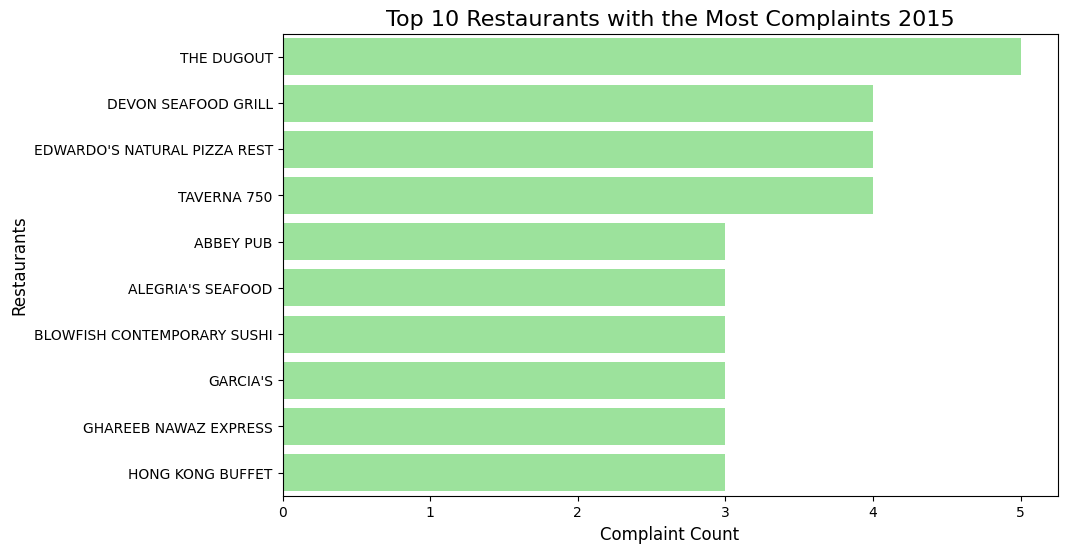

In [143]:
# FIG 1 Top 10 Restaurants with the Most Complaints 2015
top_complaints = sorted_complaints.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Complaint Count', y='AKA NAME', data=top_complaints, color='lightgreen', legend=False)
plt.title('Top 10 Restaurants with the Most Complaints 2015', fontsize=16)
plt.xlabel('Complaint Count', fontsize=12)
plt.ylabel('Restaurants', fontsize=12)
plt.show()

In [179]:
# Percentage Calculations for Pass, Pass with Conditions. Fail
total_restaurant = restaurant_list_2015.shape[0]
modified_total = total_restaurant - bus_notfound - bus_closed - bus_no_entry - not_ready
pass_rate = results_pass.shape[0]
pass_percentage = pass_rate/modified_total
pass_percentage = f"{pass_percentage * 100:.2f}"

conditional_pass_rate = results_conditional_pass.shape[0]
#total_restaurant = restaurant_list.shape[0]
cond_pass_percentage = conditional_pass_rate/modified_total
cond_pass_percentage = f"{cond_pass_percentage * 100:.2f}"

fail_rate = results_fail.shape[0]
#total_restaurant = restaurant_list.shape[0]
fail_percentage = fail_rate/modified_total
fail_percentage = f"{fail_percentage * 100:.2f}"

# Formating for Chart
chart_results = restaurant_list_2015['RESULTS'].value_counts().reset_index()
chart_results.columns = ['RESULTS', 'Count']



## Feature Engineering

In [138]:
# Feature Engineering: I created columns to cross refference the complaints with the inspection results

complaints_by_address = restaurant_list_2015.groupby(['AKA NAME', 'ADDRESS']).size().reset_index(name='Complaint Count')
results_by_address = (
    restaurant_list_2015.groupby(['ADDRESS', 'RESULTS'])
    .size()
    .reset_index(name='Count')
)
pivot_results = results_by_address.pivot_table(
    index='ADDRESS',
    columns='RESULTS',
    values='Count',
    fill_value=0
).reset_index()

merged_results = complaints_by_address.merge(
    pivot_results,
    on='ADDRESS',
    how='left'
)

merged_results.rename(
    columns={
        'Pass': 'Pass Count',
        'Fail': 'Fail Count',
        'Pass With Conditions': 'Pass With Conditions Count'
    },
    inplace=True
)

sorted_results = merged_results.sort_values(
    by=['Complaint Count', 'AKA NAME', 'ADDRESS'],
    ascending=[False, True, True]
).reset_index(drop=True)

print(sorted_results.head(10))

                       AKA NAME                ADDRESS  Complaint Count  \
0                    THE DUGOUT      950 W ADDISON ST                 5   
1           DEVON SEAFOOD GRILL      39 E CHICAGO AVE                 4   
2  EDWARDO'S NATURAL PIZZA REST     2662 N HALSTED ST                 4   
3                   TAVERNA 750    750 W CORNELIA AVE                 4   
4                     ABBEY PUB       3420 W GRACE ST                 3   
5             ALEGRIA'S SEAFOOD    1024 N ASHLAND AVE                 3   
6   BLOWFISH CONTEMPORARY SUSHI  1131 W BRYN MAWR AVE                 3   
7                      GARCIA'S   1758 W LAWRENCE AVE                 3   
8         GHAREEB NAWAZ EXPRESS    807 W ROOSEVELT RD                 3   
9              HONG KONG BUFFET   6249 N MCCORMICK RD                 3   

   Fail Count  No Entry  Not Ready  Out of Business  Pass Count  \
0         0.0       3.0        0.0              0.0         2.0   
1         1.0       2.0        0.0      

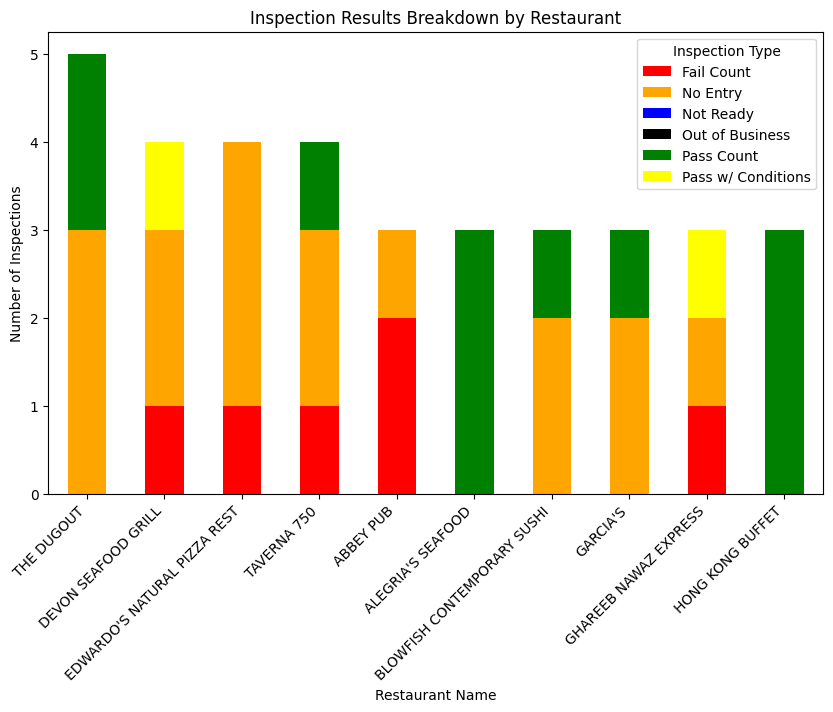

In [180]:
# Fig 2 Plot stacked bar chart for inspection results
restaurant_data = sorted_results.head(10)
inspection_types = ['Fail Count', 'No Entry', 'Not Ready', 'Out of Business', 'Pass Count', 'Pass w/ Conditions']

restaurant_data.set_index('AKA NAME')[inspection_types].plot(
    kind='bar', # ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')
    stacked=True,
    figsize=(10, 6),
    color=['red', 'orange', 'blue', 'black', 'green', 'yellow']
)
plt.xlabel('Restaurant Name')
plt.xticks(x, restaurants, rotation=45, ha='right')
plt.ylabel('Number of Inspections')
plt.title('Inspection Results Breakdown by Restaurant')
plt.legend(title='Inspection Type')
#plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()


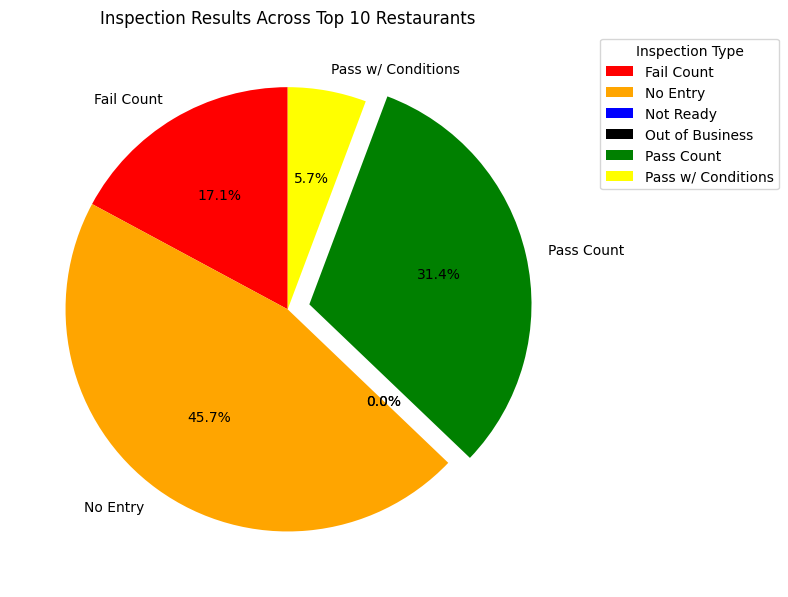

In [181]:
# Fig 3 Results of inspections
inspection_totals = restaurant_data[inspection_types].sum()
explode = [0.1 if inspection == "Pass Count" else 0 for inspection in inspection_totals.index]

plt.figure(figsize=(8, 8))
inspection_totals.plot(
    kind='pie',
    autopct='%1.1f%%',  #
    colors=['red', 'orange', 'blue', 'black', 'green', 'yellow'],
    startangle=90, 
    explode=explode, 
    ylabel='' 
)
plt.title('Inspection Results Across Top 10 Restaurants')
plt.legend(inspection_totals.index, title='Inspection Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 5. Analysis and Insights


Based on the charts I created I can see that the biggest obtacles for inspectors seems to be entry into the facilities.  Of the inspections done the majority of inspections resulted in passing conditions.  In a single year, 2015, most restaurants recieved at least one complaint, with the average being 1.19 complaints.  The restaurant with the most complaints "The Dugout" passed their inspection once entry was able to be made.  I also glanced at the sorted complaints data frame and in the top 50 restaurants with complaints only 2 chain restaurants were listed, KFC, and Boston Market.  I believe that I can infer that Chain restaurants will be less likely to fail there inspections.  I hypothesis is that there are established methods for cleaning and inspecting that are standardized in each franchise location.  This may be lacking in owner operator small business restaurants which make up the majority of this list.

I believe that more analysis could be made by breaking down each years results to see if the same locations continuelly struggle with their inspections.